In [16]:
import networkx as nx
import random
import numpy as np

In [17]:
g=nx.Graph()

In [18]:
num_users = 20

In [19]:
user_nodes= range(1, num_users+1)

In [20]:
g.add_nodes_from(user_nodes, node_type='user')

In [21]:
area= (100, 100)

In [22]:
for user in user_nodes:
    x= random.uniform(0, area[0])
    y= random.uniform(0, area[1])
    g.nodes[user]['pos']= (x, y)

In [23]:
p= nx.get_node_attributes(g, 'pos')

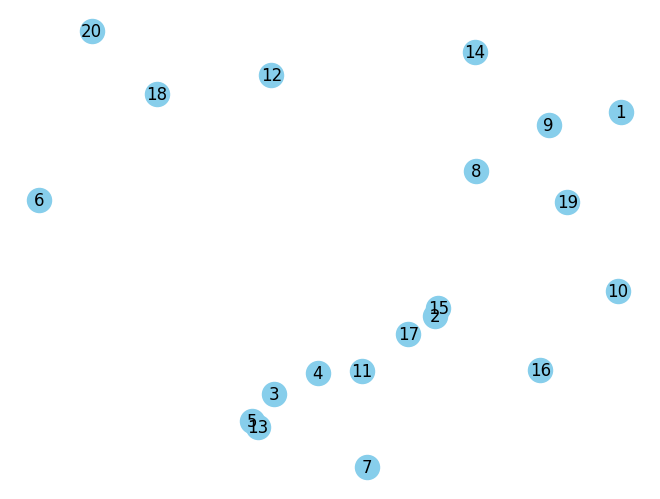

In [24]:
nx.draw(g, p , with_labels=True, node_size=300, node_color='skyblue', font_color='black')

In [25]:
d_thresh= 20

In [26]:
for i in range(num_users):
    for j in range(i+1, num_users):
        x1=g.nodes[i+1]['pos'][0]
        y1=g.nodes[i+1]['pos'][1]
        x2=g.nodes[j+1]['pos'][0]
        y2=g.nodes[j+1]['pos'][1]

        d= np.linalg.norm(np.array([x1, y1])-np.array([x2,y2]))
        if d<d_thresh:
            g.add_edge(i+1, j+1, dummy_edge='False')

In [27]:
p= nx.get_node_attributes(g, 'pos')

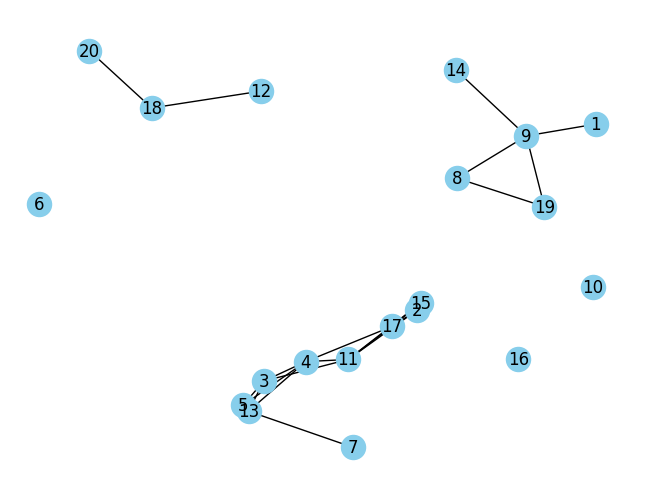

In [28]:
nx.draw(g, p , with_labels=True, node_size=300, node_color='skyblue', font_color='black')

In [29]:
V= num_users
limit=6
def is_safe(v, graph, color, c,count):
    for i in range(V):
        if ((graph[v][i] and c==color[i]) or count[c]==limit):
            return False
    return True

def graph_color(graph, m, color, v,count):
    if v==V:
        return True

    for c in range(1, m+1):
        if is_safe(v, graph, color, c,count):
            color[v]=c
            count[c]=count[c] + 1
            if graph_color(graph, m, color, v+1,count):
                return True

        color[v]=0
    min = 0
    for i in range(len(count)):
      if(count[i] <= count[min]):
        min = i
    color[v] = min
    return True

def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    for i in range(V):
        print(color[i], end=" ")
    print("\n")

def coloring(graph, m):
    color= [0]*V
    count = [0]*(m+1)
    if not graph_color(graph, m, color, 0,count):
        print("Solution does not exist")
        return False

    print_solution(color)
    print("Length of color array:", len(color))  # Add this line
    return color

In [30]:
# Convert NetworkX graph to adjacency matrix
adjacency_matrix = nx.linalg.graphmatrix.adjacency_matrix(g).toarray().astype(int)

In [31]:
colors= coloring(adjacency_matrix, 4)

Solution Exists: Following are the assigned colors
1 1 1 2 3 1 1 1 2 2 3 2 4 3 2 2 4 3 3 4 

Length of color array: 20
